/var/folders/4t/z94gcqws7zj_cqmw9fnrxbq00000gn/T/ipykernel_12063/2743183035.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Fichier CSV 'donnees_vaccination_reelles_simulees.csv' généré avec succès !
Statistique du test Shapiro-Wilk: 0.9924660683688997, P-value: 5.6824235458299014e-05


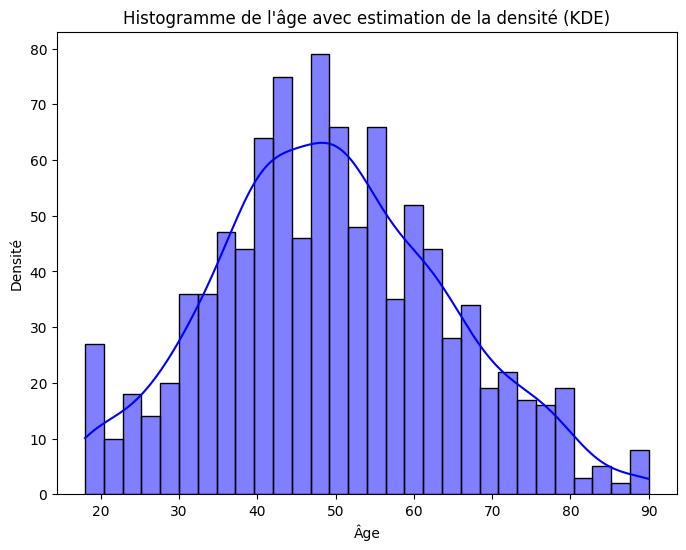

Les âges ne suivent presque une distribution normale.


In [1]:
from datetime import datetime, timedelta #use Python 3.12.6
import random
import numpy as np
import pandas as pd
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Paramètres pour la génération
num_samples = 1000  # Nombre d'échantillons max

# Générer des IDs uniques
ids = np.arange(1, num_samples + 1)

# Générer des âges entre 18 et 90 ans (simulons que l'âge suit une distribution normale)
ages = np.random.normal(loc=50, scale=15, size=num_samples).astype(int)
ages = np.clip(ages, 18, 90)  # S'assurer que l'âge est entre 18 et 90 ans

# Générer des types de vaccins
vaccines = np.random.choice(['Pfizer', 'Moderna', 'AstraZeneca', 'Johnson & Johnson'], size=num_samples)

# Générer le type de dose
doses = np.random.choice(['Première dose', 'Deuxième dose', 'Booster'], size=num_samples)

# Générer des régions aléatoires
regions = np.random.choice(['Île-de-France', 'Occitanie', 'Nouvelle-Aquitaine', 'Auvergne-Rhône-Alpes', 'Provence-Alpes-Côte d\'Azur'], size=num_samples)

# Générer des dates de vaccination dans une période donnée (par exemple, en 2023)
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)

# Générer des dates de vaccination aléatoires
dates = [start_date + timedelta(days=random.randint(0, (end_date - start_date).days)) for _ in range(num_samples)]

# Créer un DataFrame avec ces données
data = pd.DataFrame({
    'ID': ids,
    'Age': ages,
    'Vaccin': vaccines,
    'Dose': doses,
    'Région': regions,
    'Date de Vaccination': dates
})

# Sauvegarder les données dans un fichier CSV
data.to_csv('donnees_vaccination_reelles_simulees.csv', index=False)

print("Fichier CSV 'donnees_vaccination_reelles_simulees.csv' généré avec succès !")

# 2. Vérification de la normalité sur l'âge avec le test de Shapiro-Wilk
stat, p_value = shapiro(data['Age'])
print(f'Statistique du test Shapiro-Wilk: {stat}, P-value: {p_value}')

# Affichage de l'histogramme et courbe de densité pour l'âge
plt.figure(figsize=(8,6))
sns.histplot(data['Age'], kde=True, bins=30, color='blue')
plt.title('Histogramme de l\'âge avec estimation de la densité (KDE)')
plt.xlabel('Âge')
plt.ylabel('Densité')
plt.show()

# Interprétation du test
alpha = 0.05
if p_value > alpha:
    print("Les âges suivent une distribution normale.")
else:
    print("Les âges ne suivent presque une distribution normale.")


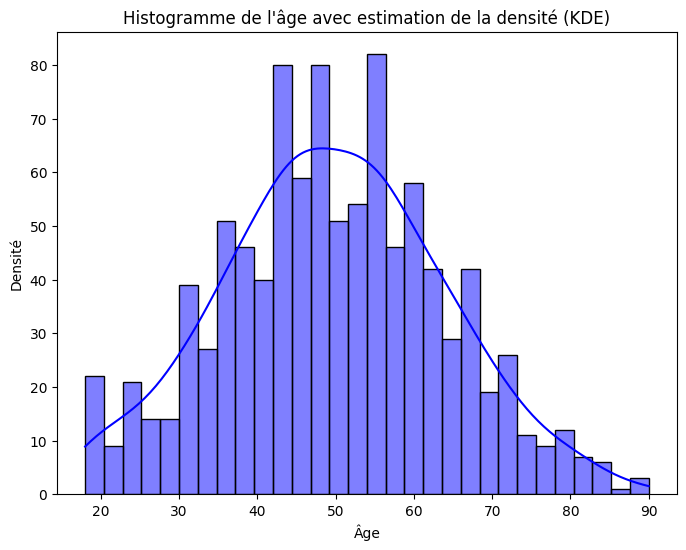

Statistique du test Shapiro-Wilk: 0.9956742300385883, P-value: 0.006469320160396484
Les âges ne suivent presque une distribution normale.


In [4]:
# Afficher l'histogramme et la courbe de densité pour l'âge
plt.figure(figsize=(8,6))
sns.histplot(data['Age'], kde=True, bins=30, color='blue')
plt.title('Histogramme de l\'âge avec estimation de la densité (KDE)')
plt.xlabel('Âge')
plt.ylabel('Densité')
plt.show()

# Test de Shapiro-Wilk pour vérifier la normalité de l'âge
stat, p_value = shapiro(data['Age'])
print(f'Statistique du test Shapiro-Wilk: {stat}, P-value: {p_value}')

# Interprétation du test
alpha = 0.05
if p_value > alpha:
    print("Les âges suivent une distribution normale.")
else:
    print("Les âges ne suivent presque une distribution normale.")


Statistique du test Shapiro-Wilk: 0.9692974706051957, P-value: 8.383866366460175e-11


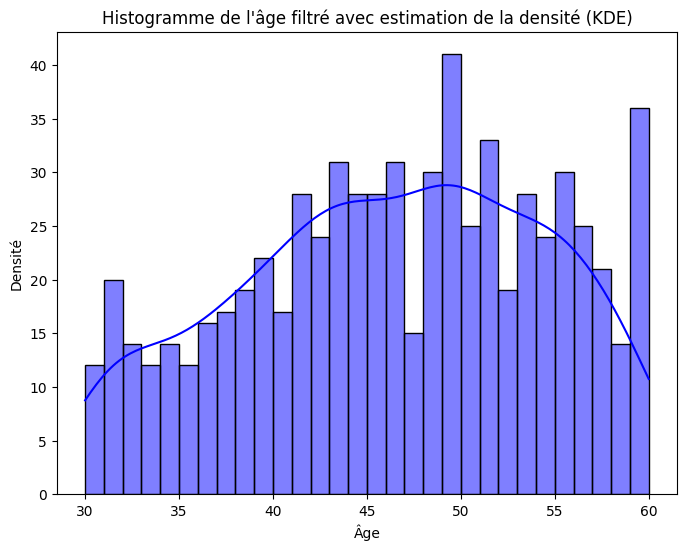

Les âges filtrés ne suivent pas une distribution normale.


In [6]:
# Exemple de sélection d'une plage d'âges entre 30 et 60 ans
filtered_data = data[(data['Age'] >= 30) & (data['Age'] <= 60)]

# Vérifier la normalité après filtrage
from scipy.stats import shapiro
stat, p_value = shapiro(filtered_data['Age'])
print(f'Statistique du test Shapiro-Wilk: {stat}, P-value: {p_value}')

# Afficher l'histogramme et la courbe de densité pour l'âge filtré
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.histplot(filtered_data['Age'], kde=True, bins=30, color='blue')
plt.title('Histogramme de l\'âge filtré avec estimation de la densité (KDE)')
plt.xlabel('Âge')
plt.ylabel('Densité')
plt.show()

# Interpréter la p-value
alpha = 0.05
if p_value > alpha:
    print("Les âges filtrés suivent une distribution normale.")
else:
    print("Les âges filtrés ne suivent pas une distribution normale.")


Statistique du test Shapiro-Wilk (log): 0.963294570947317, P-value: 3.601532868273239e-15


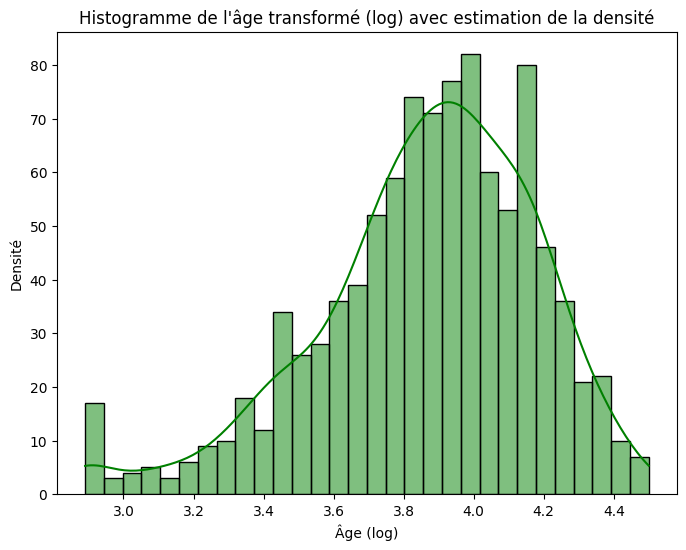

Les données transformées ne suivent pas une distribution normale.


In [7]:
import numpy as np

# Appliquer une transformation logarithmique à l'âge (par exemple)
data['Age_log'] = np.log(data['Age'])

# Vérifier la normalité sur les données transformées
stat, p_value = shapiro(data['Age_log'])
print(f'Statistique du test Shapiro-Wilk (log): {stat}, P-value: {p_value}')

# Afficher l'histogramme pour les données transformées
plt.figure(figsize=(8,6))
sns.histplot(data['Age_log'], kde=True, bins=30, color='green')
plt.title('Histogramme de l\'âge transformé (log) avec estimation de la densité')
plt.xlabel('Âge (log)')
plt.ylabel('Densité')
plt.show()

# Interpréter la p-value
if p_value > alpha:
    print("Les données transformées suivent une distribution normale.")
else:
    print("Les données transformées ne suivent pas une distribution normale.")
